In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
# Load the dataset

data = pd.read_csv('Telecust1.csv')

# Exploratory Data Analysis
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nDataset description:")
print(data.describe())

First 5 rows of the dataset:
   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside custcat  
0       2       A  
1       6       D  
2       2       C  
3       1       A  
4       4       C  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null

In [20]:
# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


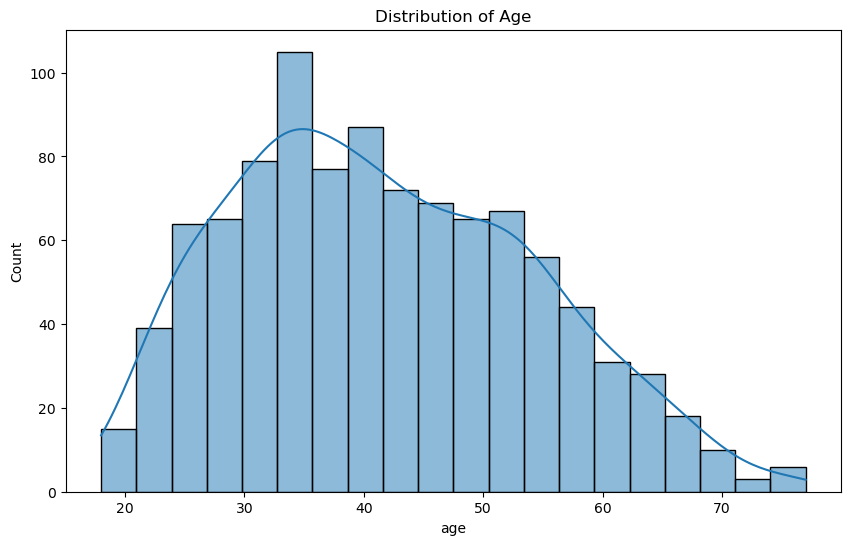

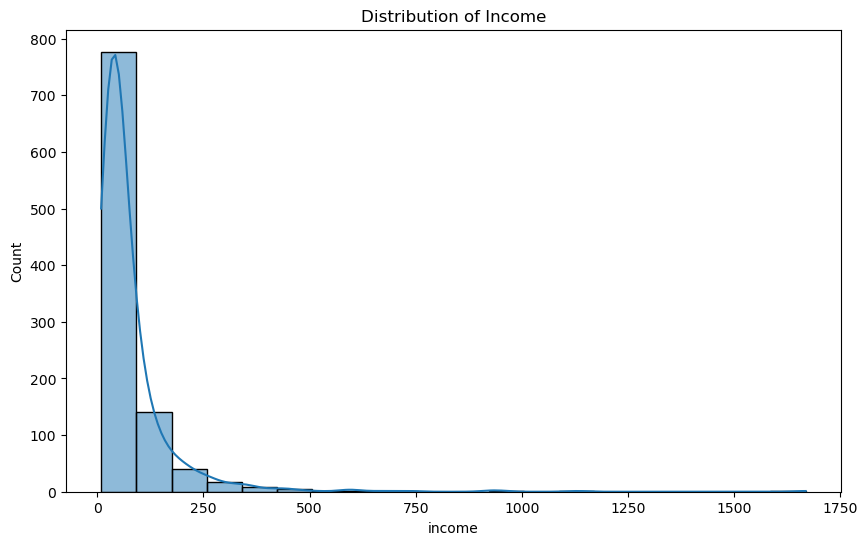

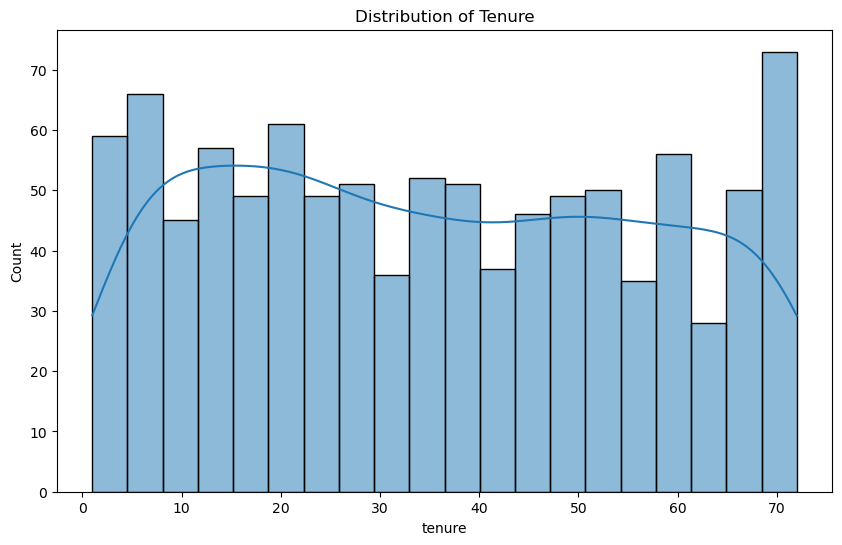

In [4]:
# Visualize the distribution of key variables
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['tenure'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.show()

In [27]:
# Preprocessing
categorical_columns = ['custcat', 'region', 'marital', 'retire', 'gender']
data = data.drop(columns=categorical_columns)

# Ensure all data is numeric
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category').cat.codes

# Preprocessing
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

KeyError: "['custcat'] not found in axis"

/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

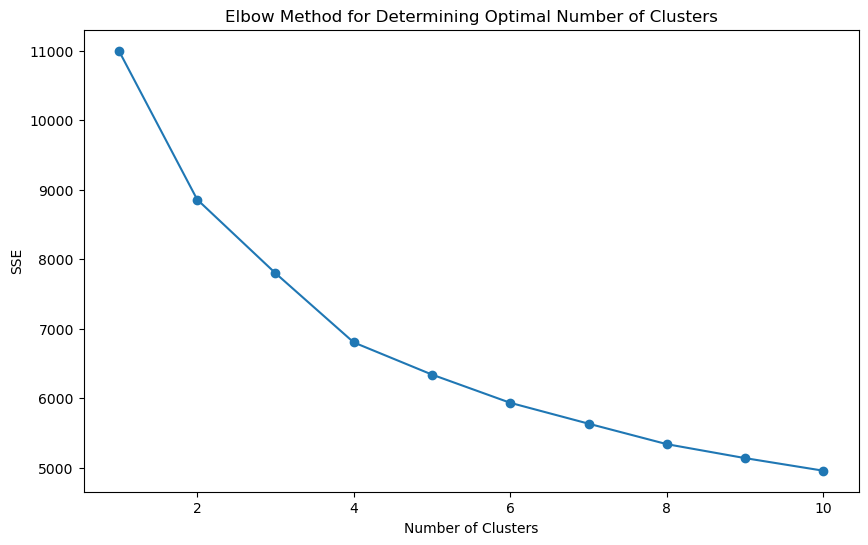

In [25]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

/Users/mattschnorr/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Centers:
[[ 1.95664740e+00  3.04306358e+01  3.54450867e+01  4.78526012e+01
   9.73988439e-01  7.26300578e+00  2.86127168e+00  6.06069364e+00
  -2.08166817e-17  5.63583815e-01  3.59537572e+00]
 [ 2.08695652e+00  2.39043478e+01  3.57478261e+01  5.17014493e+01
  -5.55111512e-16  7.42028986e+00  2.82608696e+00  6.27826087e+00
  -2.08166817e-17  4.86956522e-01  1.43768116e+00]
 [ 2.04255319e+00  5.19787234e+01  6.59574468e+01  3.72340426e+01
   3.19148936e-01  2.48297872e+01  2.04255319e+00  2.35744681e+01
   1.00000000e+00  6.38297872e-01  1.42553191e+00]
 [ 2.01908397e+00  5.46068702e+01  5.33854962e+01  1.57980916e+02
   5.45801527e-01  2.02709924e+01  2.32824427e+00  2.14351145e+01
  -4.85722573e-17  4.73282443e-01  2.00000000e+00]]


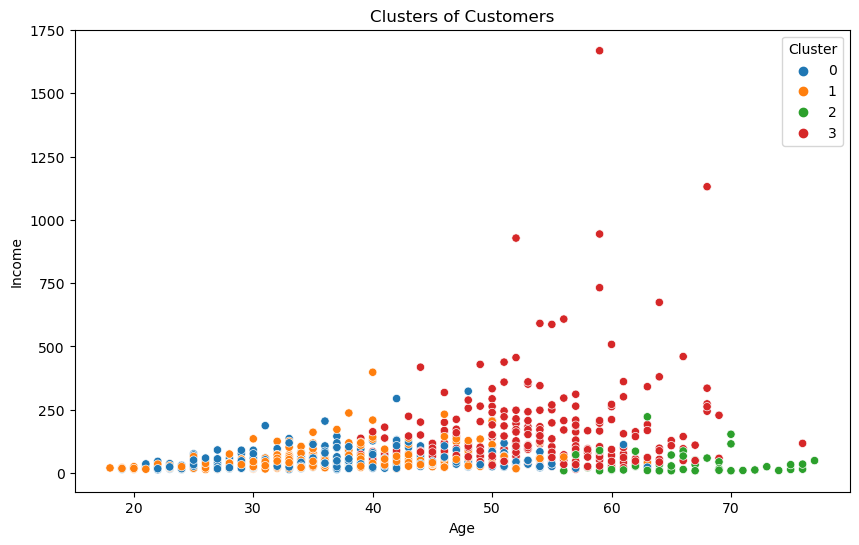


Silhouette Score: 0.18


In [26]:
# Based on the elbow plot, choose the optimal number of clusters
optimal_clusters = 4  # Adjust this based on the elbow plot

# K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)
clusters = kmeans.labels_

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Cluster properties
print("\nCluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Visualize the clusters (2D projection for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['income'], hue=data['Cluster'], palette='tab10')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Evaluate the clusters
silhouette_avg = silhouette_score(data_scaled, clusters)
print("\nSilhouette Score: {:.2f}".format(silhouette_avg))
